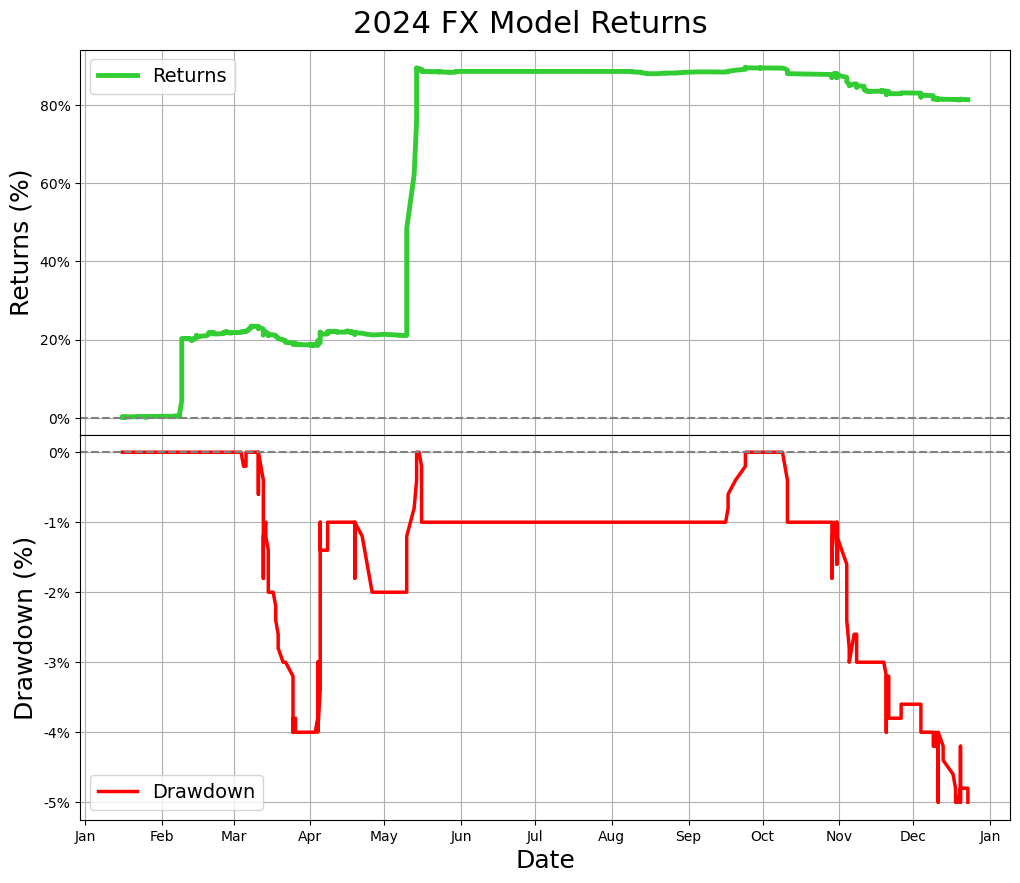

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Load your CSV directly from GitHub
url = "https://raw.githubusercontent.com/JoshuaCarriere/BankofCanada/main/2024_returns.csv"
df = pd.read_csv(url)

# Preprocessing (exactly as before)
df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year == 2024]
df['returns'] *= 100
df['drawdown'] *= 100
df = df.sort_values('date')

# Plot setup
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'hspace': 0})
fig.suptitle("2024 FX Model Returns", fontsize=22, y=0.92)

formatter = mticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

for axis in ax:
    axis.xaxis.set_major_locator(mdates.MonthLocator())
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Smoothed returns plot
ax[0].plot(df['date'], df['returns'].rolling(window=5).mean(),
           linewidth=3.5, color='limegreen', label='Returns')
ax[0].axhline(0, color='gray', linestyle='--')
ax[0].set_ylabel("Returns (%)", fontsize=18)
ax[0].legend(fontsize=14)
ax[0].grid()
ax[0].yaxis.set_major_formatter(formatter)

# Smoothed drawdown plot
ax[1].plot(df['date'], df['drawdown'].rolling(window=5).mean(),
           linewidth=2.5, color='red', label='Drawdown')
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_xlabel("Date", fontsize=18)
ax[1].set_ylabel("Drawdown (%)", fontsize=18)
ax[1].legend(fontsize=14)
ax[1].grid()
ax[1].yaxis.set_major_formatter(formatter)

plt.show()

# Boxplot by account
account_col = next((col for col in df.columns if 'account' in col), None)
if account_col:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=account_col, y='returns', data=df)
    plt.title("Returns Distribution by Account", fontsize=18)
    plt.xlabel("Account", fontsize=18)
    plt.ylabel("Returns (%)", fontsize=18)
    plt.xticks(rotation=45, fontsize=16)
    plt.grid()
    plt.show()
